# Intro to ML Summer Group Project 2 - H1B Form
[Kaggle Dataset Link](https://www.kaggle.com/datasets/rakeshchintha/oflc-h1b-data?select=h1b_data_fy2011_fy2018_20190401.csv)

## About Dataset
The H1B visa is an employment-based, non-immigrant visa for temporary workers. For this visa, an employer must offer a job in the US and apply for your H1B visa petition with the US Immigration Department. This approved petition is a work permit which allows you to obtain a visa stamp and work in the U.S. for that employer.

## Import Base Packages

In [ ]:
!pip install imbalanced-learn

In [1]:
import warnings
warnings.filterwarnings('ignore')

import re
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Import Data

In [5]:
h1b_df1 = pd.read_csv('h1b_data.csv')
#h1b_df1.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc9 in position 151528: invalid continuation byte

In [4]:
h1b_df1.isnull().sum()

NameError: name 'h1b_df1' is not defined

In [1]:
h1b_df2 = h1b_df1[h1b_df1['fiscal_year'] >= 2017].copy()
h1b_df2.head(5)

NameError: name 'h1b_df1' is not defined

In [ ]:
h1b_df2.shape

(1249823, 21)

In [ ]:
h1b_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249823 entries, 2942264 to 4192086
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   fiscal_year         1249823 non-null  int64  
 1   case_status         1249823 non-null  object 
 2   case_submitted      1249822 non-null  object 
 3   decision_date       1249823 non-null  object 
 4   emp_name            1249751 non-null  object 
 5   emp_city            1249798 non-null  object 
 6   emp_state           1249762 non-null  object 
 7   emp_zip             1249594 non-null  float64
 8   job_title           1249813 non-null  object 
 9   soc_code            1226587 non-null  object 
 10  soc_name            1249810 non-null  object 
 11  naics_code          1249810 non-null  object 
 12  full_time_position  1249812 non-null  float64
 13  prevailing_wage     1249819 non-null  float64
 14  pw_unit             1249752 non-null  object 
 15  wage_from

In [ ]:
h1b_df2.describe()

,fiscal_year,emp_zip,full_time_position,prevailing_wage,wage_from,wage_to,work_zip
count,1.249823e+06,1.249594e+06,1.249812e+06,1.249819e+06,1.249823e+06,1.249819e+06,1.249389e+06
mean,2.017512e+03,4.830570e+04,9.793633e-01,7.753928e+04,8.674648e+04,2.475710e+04,5.157441e+04
std,4.998636e-01,3.358584e+04,1.421649e-01,9.130732e+05,8.955175e+05,5.401181e+04,3.352748e+04
min,2.017000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.017000e+03,1.520500e+04,1.000000e+00,6.042400e+04,6.500000e+04,0.000000e+00,1.971100e+04
50%,2.018000e+03,4.808300e+04,1.000000e+00,7.519200e+04,8.100000e+04,0.000000e+00,4.920100e+04
75%,2.018000e+03,7.784500e+04,1.000000e+00,9.314200e+04,1.030000e+05,0.000000e+00,8.525900e+04
max,2.018000e+03,9.998800e+04,1.000000e+00,1.000000e+09,1.000000e+09,9.103328e+06,9.992900e+04


In [ ]:
h1b_df2[h1b_df2.isna().any(axis=1)].head(5)

,fiscal_year,case_status,case_submitted,decision_date,emp_name,emp_city,emp_state,emp_zip,job_title,soc_code,...,naics_code,full_time_position,prevailing_wage,pw_unit,wage_from,wage_to,wage_unit,work_city,work_state,work_zip
2942299,2017,CW,3/25/2014,10/3/2016,HEARST COMMUNICATIONS INC.,NEW YORK,NY,10019.0,INTEGRATED SALES MANAGER,NaN,...,511120.0,1.0,97900.0,Y,120000.0,0.0,Y,NEW YORK,NY,10019.0
2942320,2017,CW,8/13/2014,10/3/2016,OOYALA INC.,MOUNTAIN VIEW,CA,94040.0,ASSOCIATE PRODUCT MANAGER,NaN,...,511210.0,1.0,99337.0,Y,115000.0,0.0,Y,MOUNTAIN VIEW,CA,94040.0
2942340,2017,CW,2/20/2015,10/3/2016,MEDIATEK USA INC.,SAN JOSE,CA,95134.0,PARTNER MANAGER,NaN,...,334410.0,1.0,111439.0,Y,114000.0,137000.0,Y,SAN JOSE,CA,95134.0
2942374,2017,CW,11/4/2015,10/3/2016,"ALPHADETAIL, INC.",SAN MATEO,CA,94404.0,SENIOR MANAGER,NaN,...,541910.0,1.0,76253.0,Y,90000.0,110000.0,Y,SAN MATEO,CA,94404.0
2942390,2017,CW,3/4/2016,10/3/2016,LAWRENCE BERKELEY NATIONAL LABORATORY,BERKELEY,CA,94720.0,SOFTWARE DEVELOPER 3,NaN,...,541710.0,1.0,78312.0,Y,95700.0,0.0,Y,BERKELEY,CA,94720.0


In [ ]:
h1b_df3 = h1b_df2.dropna()
h1b_df3 = h1b_df3.drop(columns=['work_zip', 'work_city', 'emp_zip', 'emp_city', 'pw_unit', 'wage_unit', 'wage_from', 'wage_to', 'emp_state'])
h1b_df3.head(5)

,fiscal_year,case_status,case_submitted,decision_date,emp_name,job_title,soc_code,soc_name,naics_code,full_time_position,prevailing_wage,work_state
2942264,2017,CW,2/24/2016,10/1/2016,DISCOVER PRODUCTS INC.,ASSOCIATE DATA INTEGRATION,15-1121,COMPUTER SYSTEMS ANALYSTS,522210.0,1.0,59197.0,IL
2942265,2017,CW,3/4/2016,10/1/2016,DFS SERVICES LLC,SENIOR ASSOCIATE,15-2031,OPERATIONS RESEARCH ANALYSTS,522210.0,1.0,49800.0,IL
2942266,2017,CW,3/10/2016,10/1/2016,EASTBANC TECHNOLOGIES LLC,.NET SOFTWARE PROGRAMMER,15-1131,COMPUTER PROGRAMMERS,541511.0,1.0,76502.0,DC
2942267,2017,W,9/28/2016,10/1/2016,INFO SERVICES LLC,PROJECT MANAGER,15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",541511.0,1.0,90376.0,NJ
2942268,2017,CW,2/22/2015,10/2/2016,BB&T CORPORATION,ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES,13-2041,CREDIT ANALYSTS,522110.0,1.0,116605.0,NY


In [ ]:
h1b_df3.shape

(1225798, 12)

## Testing

### EDA

Forms Submitetd By Year

<Axes: >

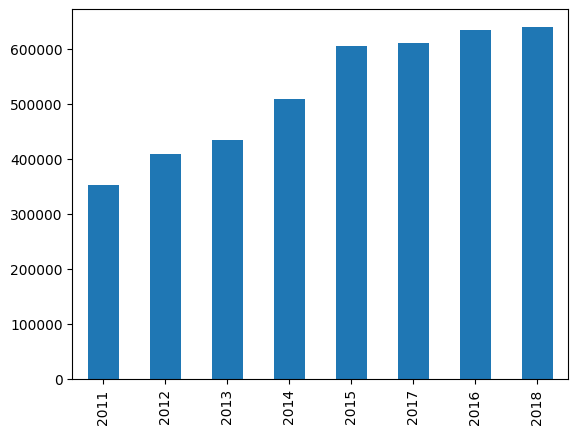

In [ ]:
testdf1 = h1b_df1['fiscal_year'].dropna().value_counts()
testdf1.sort_values().plot.bar()

Forms Approved By Year

<Axes: >

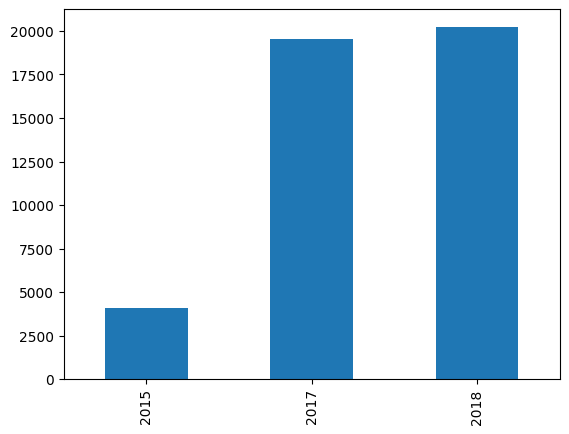

In [ ]:
testdf2 = h1b_df1.dropna()
testdf2 = testdf2[testdf2['case_status'] == 'W']
testdf2['fiscal_year'].value_counts().sort_values().plot.bar()

In [ ]:
case_counts = h1b_df1.groupby(['fiscal_year', 'case_status']).size().unstack(fill_value=0)
total_cases_per_year = case_counts.sum(axis=1)
(case_counts.div(case_counts.sum(axis=1), axis=0) * 100).round(2)

case_status,C,CW,D,W
fiscal_year,,,,
2011,86.06,3.25,7.87,2.83
2012,84.99,7.52,4.87,2.62
2013,86.70,8.05,2.59,2.65
2014,87.76,7.03,2.12,3.09
2015,88.59,6.66,1.60,3.14
2016,88.02,7.30,1.29,3.38
2017,87.44,8.01,1.23,3.33
2018,88.66,6.90,1.18,3.26


In [ ]:
testdf3 = h1b_df1.dropna()
testdf3[(testdf3['case_status'] == 'W') & (testdf3['fiscal_year']==2016)]

,fiscal_year,case_status,case_submitted,decision_date,emp_name,emp_city,emp_state,emp_zip,job_title,soc_code,...,naics_code,full_time_position,prevailing_wage,pw_unit,wage_from,wage_to,wage_unit,work_city,work_state,work_zip


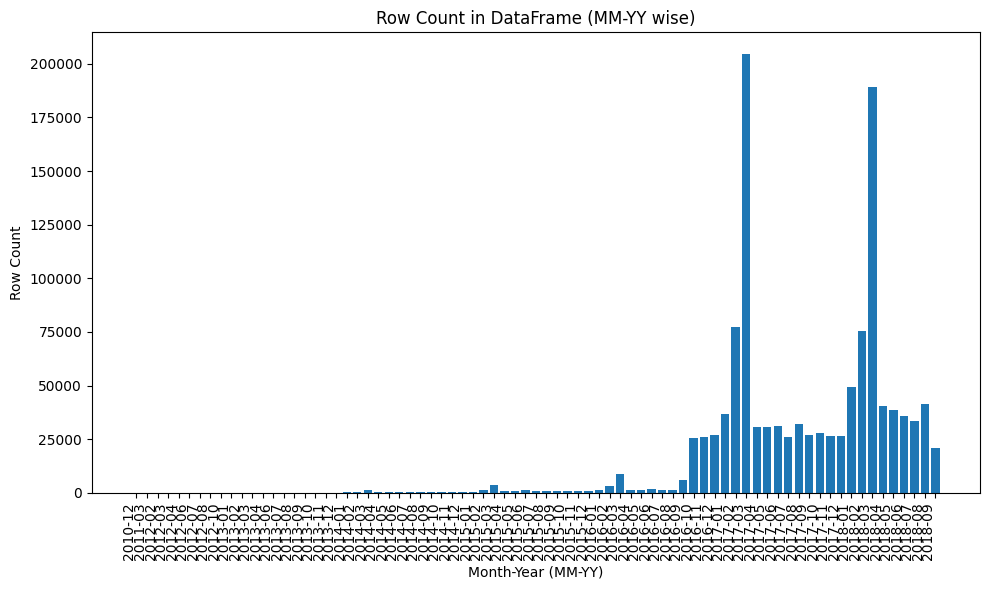

In [ ]:
testdf4 = h1b_df3.copy()
testdf4['case_submitted'] = pd.to_datetime(testdf4['case_submitted'])
monthly_counts = testdf4.groupby(testdf4['case_submitted'].dt.strftime('%Y-%m')).size().reset_index(name='row_count').sort_values(by='case_submitted')

plt.figure(figsize=(10, 6))
plt.bar(monthly_counts['case_submitted'], monthly_counts['row_count'])
plt.xlabel('Month-Year (MM-YY)')
plt.ylabel('Row Count')
plt.title('Row Count in DataFrame (MM-YY wise)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

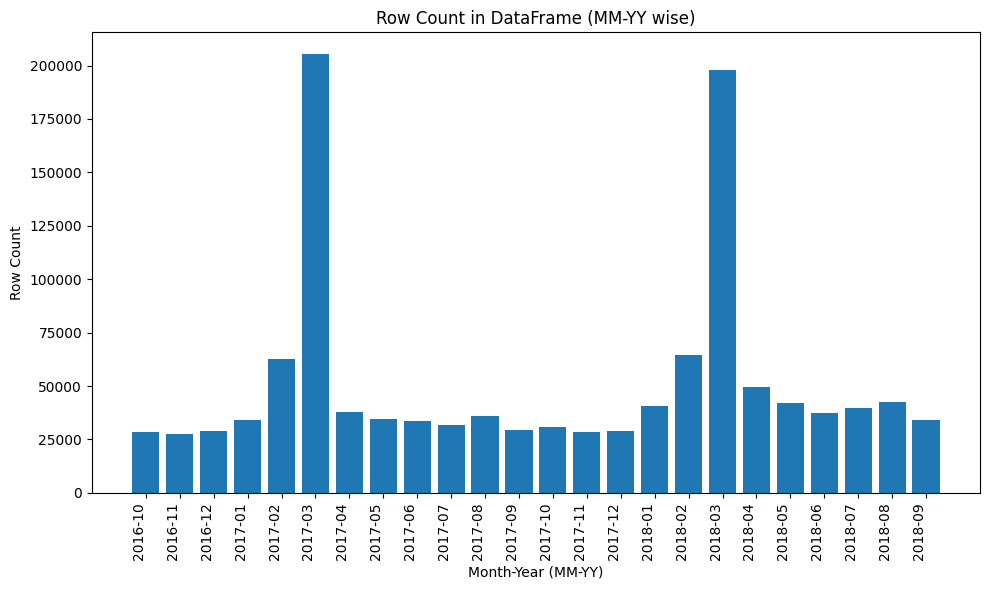

In [ ]:
testdf4['decision_date'] = pd.to_datetime(testdf4['decision_date'])
monthly_counts = testdf4.groupby(testdf4['decision_date'].dt.strftime('%Y-%m')).size().reset_index(name='row_count').sort_values(by='decision_date')

plt.figure(figsize=(10, 6))
plt.bar(monthly_counts['decision_date'], monthly_counts['row_count'])
plt.xlabel('Month-Year (MM-YY)')
plt.ylabel('Row Count')
plt.title('Row Count in DataFrame (MM-YY wise)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

Company Wise Form Count

<Axes: >

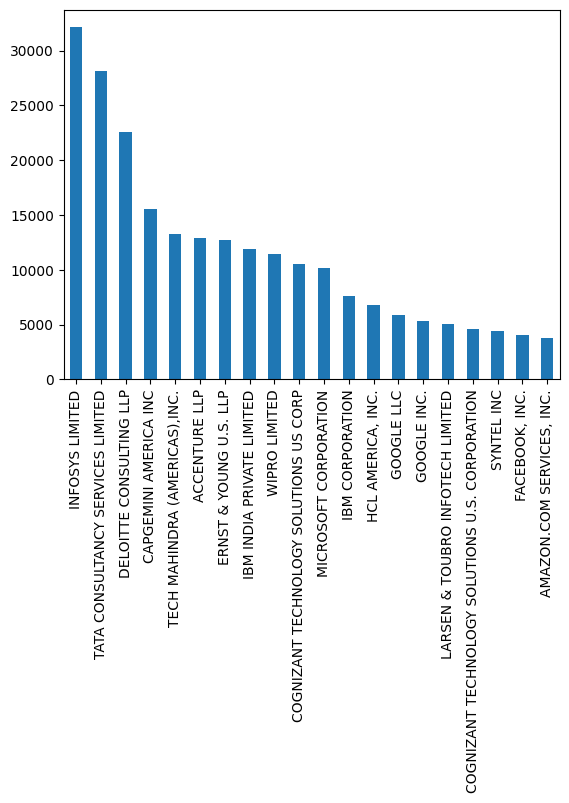

In [ ]:
h1b_df3['emp_name'].value_counts().sort_values(ascending=False).head(20).plot.bar()

State Wise Form Count

<Axes: >

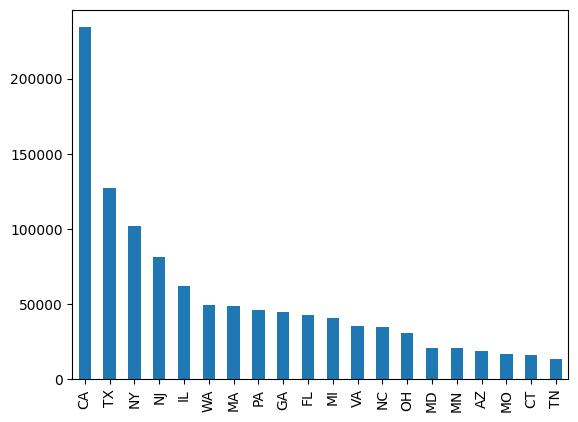

In [ ]:
h1b_df3['work_state'].value_counts().sort_values(ascending=False).head(20).plot.bar()

Position Wise Form Count

<Axes: >

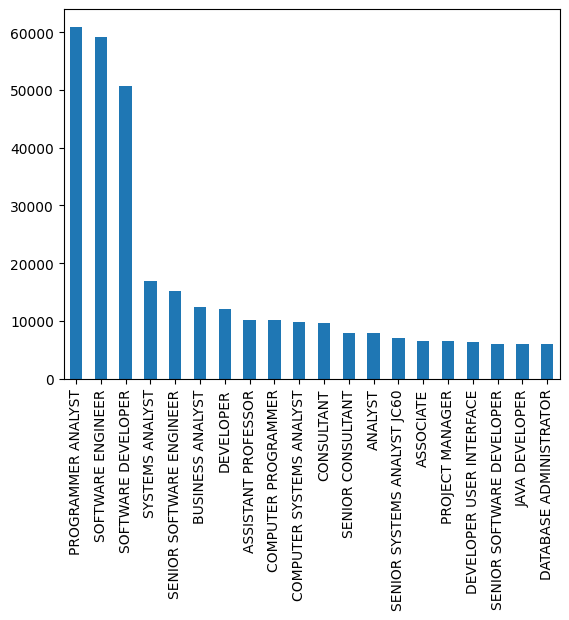

In [ ]:
h1b_df3['job_title'].value_counts().sort_values(ascending=False).head(20).plot.bar()

<Axes: >

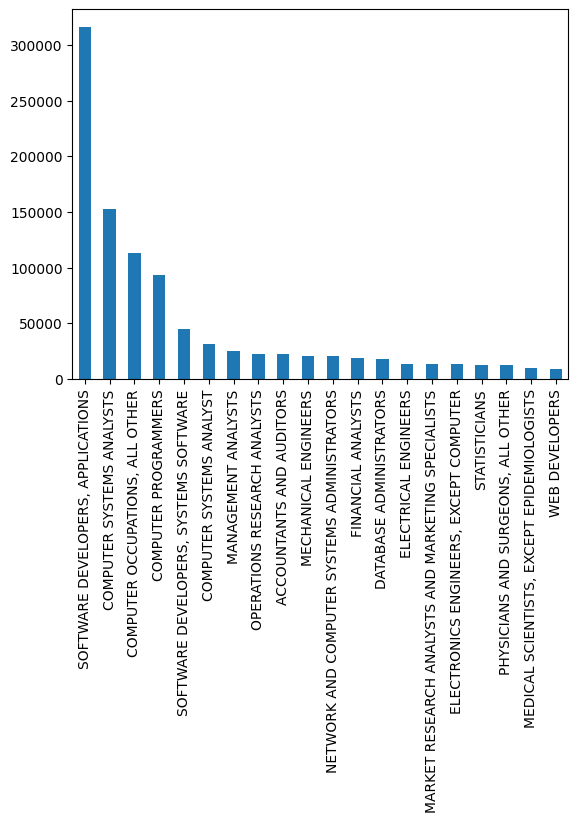

In [ ]:
h1b_df3['soc_name'].value_counts().sort_values(ascending=False).head(20).plot.bar()

FT Form Count

<Axes: >

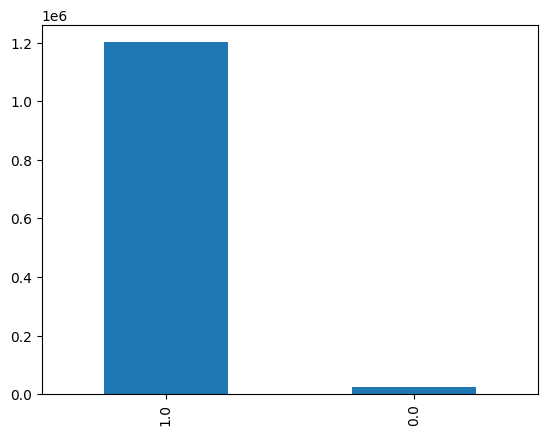

In [ ]:
h1b_df3['full_time_position'].value_counts().sort_values(ascending=False).head(20).plot.bar()

Wage Distribution

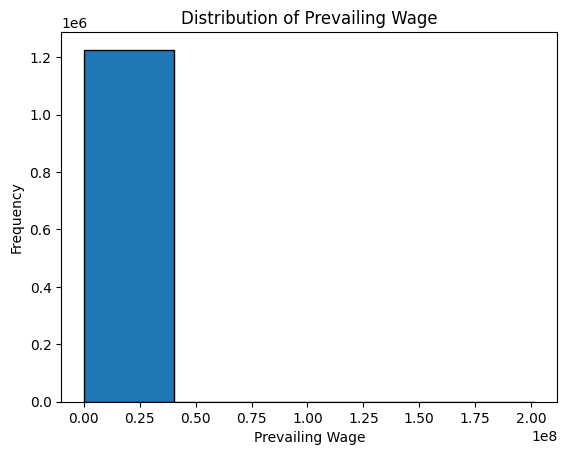

In [ ]:
plt.hist(h1b_df3['prevailing_wage'], bins=5, edgecolor='black')
plt.xlabel('Prevailing Wage')
plt.ylabel('Frequency')
plt.title('Distribution of Prevailing Wage')
plt.show()

In [ ]:
h1b_df3['job_title'].nunique()

155620

In [ ]:
h1b_df3['soc_name'].nunique()

1053

In [ ]:
h1b_df3['emp_name'].nunique()

99054

In [ ]:
h1b_df3['work_state'].nunique()

58

In [ ]:
h1b_df3['case_status'].unique()

array(['CW', 'W', 'C', 'D'], dtype=object)

In [ ]:
h1b_df3.head(3)

,fiscal_year,case_status,case_submitted,decision_date,emp_name,job_title,soc_code,soc_name,naics_code,full_time_position,prevailing_wage,work_state
2942264,2017,CW,2/24/2016,10/1/2016,DISCOVER PRODUCTS INC.,ASSOCIATE DATA INTEGRATION,15-1121,COMPUTER SYSTEMS ANALYSTS,522210.0,1.0,59197.0,IL
2942265,2017,CW,3/4/2016,10/1/2016,DFS SERVICES LLC,SENIOR ASSOCIATE,15-2031,OPERATIONS RESEARCH ANALYSTS,522210.0,1.0,49800.0,IL
2942266,2017,CW,3/10/2016,10/1/2016,EASTBANC TECHNOLOGIES LLC,.NET SOFTWARE PROGRAMMER,15-1131,COMPUTER PROGRAMMERS,541511.0,1.0,76502.0,DC


In [ ]:
# testdf2 = h1b_df1.dropna()
testdf2 = testdf2[testdf2['case_status'] == 'W']
h1b_df3['fiscal_year'].value_counts().sort_values()

2017    589433
2018    636365
Name: fiscal_year, dtype: int64

### Attempt 1

In [ ]:
h1b_df4 = h1b_df3.drop(columns=['case_submitted', 'decision_date', 'soc_name', 'fiscal_year', 'job_title']).head(10000).copy()
h1b_df4

,case_status,emp_name,soc_code,naics_code,full_time_position,prevailing_wage,work_state
2942264,CW,DISCOVER PRODUCTS INC.,15-1121,522210.0,1.0,59197.0,IL
2942265,CW,DFS SERVICES LLC,15-2031,522210.0,1.0,49800.0,IL
2942266,CW,EASTBANC TECHNOLOGIES LLC,15-1131,541511.0,1.0,76502.0,DC
2942267,W,INFO SERVICES LLC,15-1199,541511.0,1.0,90376.0,NJ
2942268,CW,BB&T CORPORATION,13-2041,522110.0,1.0,116605.0,NY
...,...,...,...,...,...,...,...
2952637,C,INTEL MOBILE COMMUNICATIONS,17-2072,3344,1.0,93450.0,CA
2952638,C,EXXONMOBIL UPSTREAM RESEARCH COMPANY,17-2171,211111,1.0,103605.0,TX
2952639,C,FIRST AMERICAN DATA TREE LLC,15-1132,531390,1.0,94800.0,CA
2952640,C,"BDO USA, LLP",13-2011,54121,1.0,64064.0,TX


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

h1b_df4["soc_code"] = h1b_df4["soc_code"].str.replace('-', '').astype(int)
h1b_df4["case_status"] = h1b_df4["case_status"].replace({"C": 1, "CW": 1, "W": 0, "D": 0})

# cols_to_embed = ['emp_name', 'soc_name', 'work_state', 'case_status']
cols_to_embed = ['emp_name', 'work_state']

# Label Encoding
for column in cols_to_embed[0:]:
    h1b_df4[column] = label_encoder.fit_transform(h1b_df4[column])

# One Hot Encoding
# df_encoded = pd.get_dummies(df, columns=cols_to_embed[1:])

h1b_df4 = h1b_df4.astype(int)
h1b_df4

,case_status,emp_name,soc_code,naics_code,full_time_position,prevailing_wage,work_state
2942264,1,884,151121,522210,1,59197,15
2942265,1,864,152031,522210,1,49800,15
2942266,1,937,151131,541511,1,76502,7
2942267,0,1508,151199,541511,1,90376,32
2942268,1,400,132041,522110,1,116605,35
...,...,...,...,...,...,...,...
2952637,1,1564,172072,3344,1,93450,4
2952638,1,1068,172171,211111,1,103605,45
2952639,1,1103,151132,531390,1,94800,4
2952640,1,401,132011,54121,1,64064,45


In [ ]:
h1b_df4['case_status'].value_counts().sort_values()

0     434
1    9566
Name: case_status, dtype: int64

In [ ]:
h1b_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2942264 to 2952641
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   case_status         10000 non-null  int64
 1   emp_name            10000 non-null  int64
 2   soc_code            10000 non-null  int64
 3   naics_code          10000 non-null  int64
 4   full_time_position  10000 non-null  int64
 5   prevailing_wage     10000 non-null  int64
 6   work_state          10000 non-null  int64
dtypes: int64(7)
memory usage: 625.0 KB


In [ ]:
(h1b_df4.corr()).round(1)

,case_status,emp_name,soc_code,naics_code,full_time_position,prevailing_wage,work_state
case_status,1.0,0.0,-0.0,0.0,-0.0,0.0,-0.0
emp_name,0.0,1.0,0.1,0.2,-0.0,-0.1,-0.0
soc_code,-0.0,0.1,1.0,0.1,-0.2,-0.1,0.0
naics_code,0.0,0.2,0.1,1.0,-0.0,-0.1,-0.0
full_time_position,-0.0,-0.0,-0.2,-0.0,1.0,0.3,-0.0
prevailing_wage,0.0,-0.1,-0.1,-0.1,0.3,1.0,-0.1
work_state,-0.0,-0.0,0.0,-0.0,-0.0,-0.1,1.0


<Axes: >

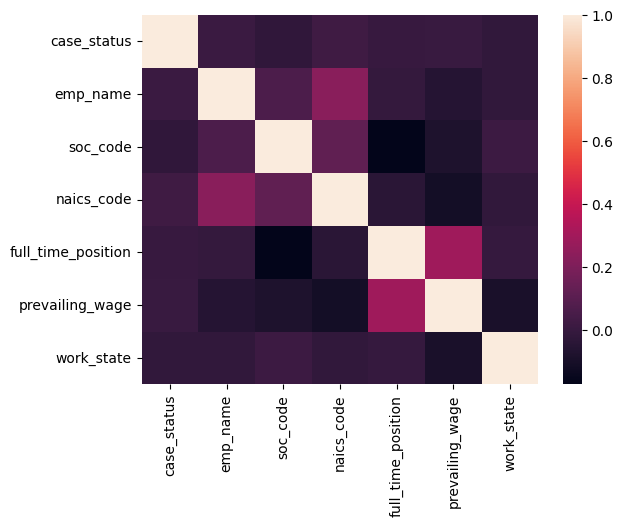

In [ ]:
sns.heatmap(h1b_df4.corr(), annot=False)

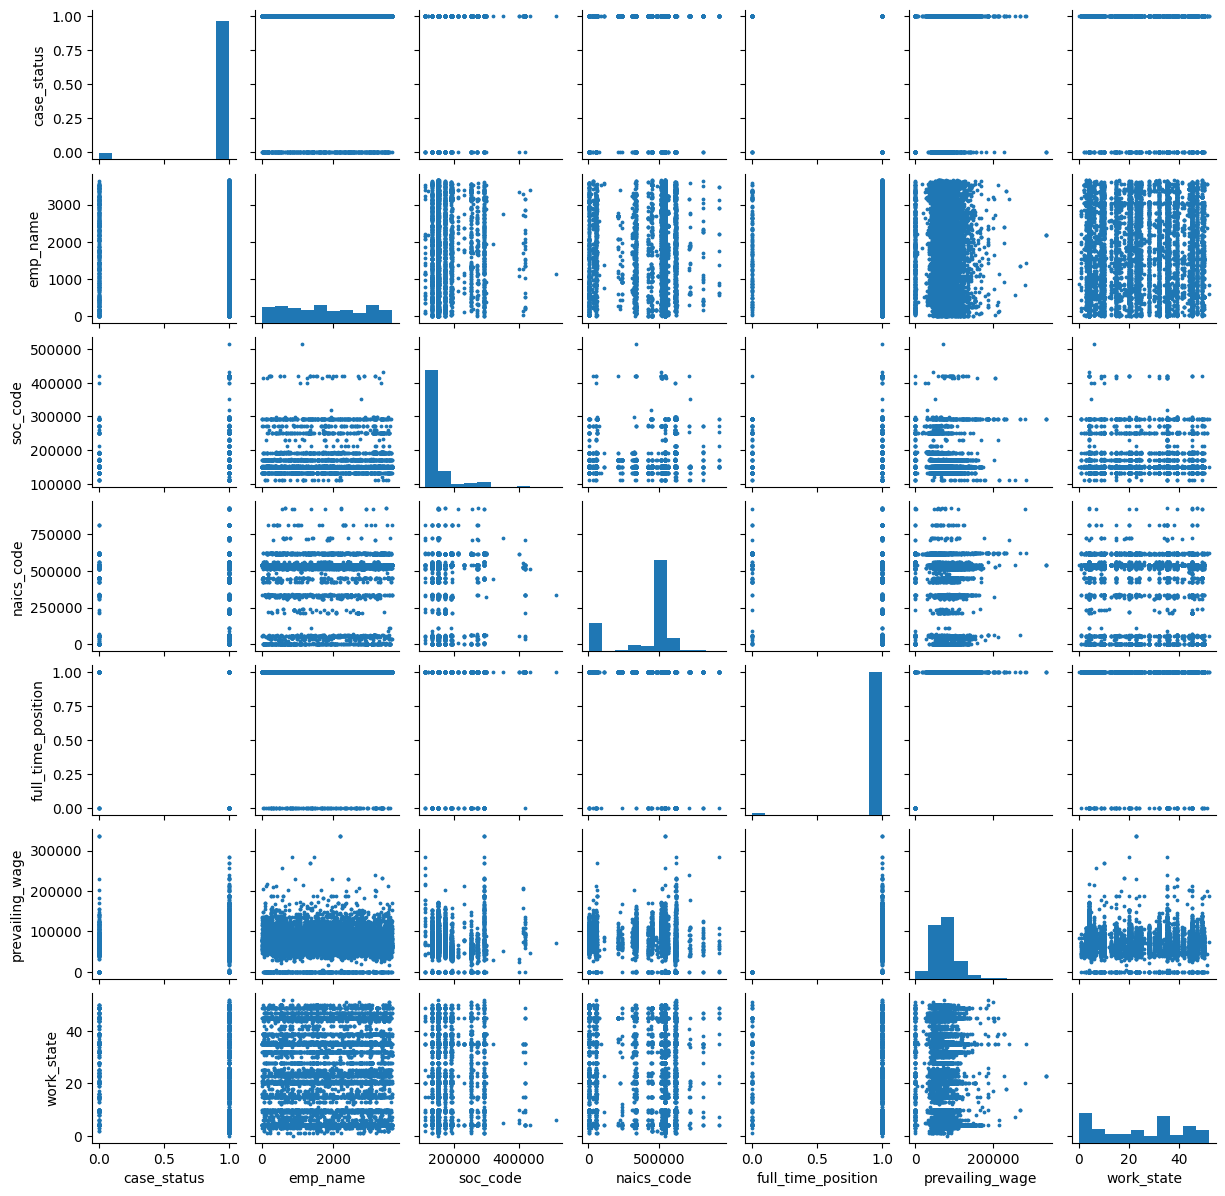

In [ ]:
g = sns.PairGrid(h1b_df4)
g.map_upper(plt.scatter, s=3)
g.map_diag(plt.hist)
g.map_lower(plt.scatter, s=3)
g.fig.set_size_inches(12, 12)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

In [ ]:
# Sampling
status_0_rows = h1b_df4[h1b_df4['case_status'] == 0]
status_1_rows = h1b_df4[h1b_df4['case_status'] == 1].sample(n=len(status_0_rows)*1, random_state=42)
print(f"status_0_rows: {len(status_0_rows)} - status_1_rows: {len(status_1_rows)}")
selected_rows = pd.concat([status_0_rows, status_1_rows])
h1b_df5 = selected_rows.sample(frac=1, random_state=42)

# Preprocessing
X = h1b_df5.drop("case_status", axis=1)
y = h1b_df5["case_status"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but often improves SVM performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Labels for Confusion Matrix
labels = sorted(y.unique())

# Count the number of positive and negative samples in the training data
num_positive_samples = sum(y_train == 1)
num_negative_samples = sum(y_train == 0)
print(f"num_positive_samples: {num_positive_samples} - num_negative_samples: {num_negative_samples}")
# Calculate the class weight for the negative class (5%)
class_weight = {0: num_positive_samples / (0.05 * num_negative_samples), 1: 1.0}
print(f"class_weight: {class_weight}")

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

status_0_rows: 434 - status_1_rows: 434
num_positive_samples: 347 - num_negative_samples: 347
class_weight: {0: 20.0, 1: 1.0}


In [ ]:
# Train and evaluate SVM
svm_classifier = SVC(kernel='rbf')  # You can use different kernels if needed
svm_classifier.fit(X_train_scaled, y_train)

y_pred_svm = svm_classifier.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=labels)

print("SVM")
print(f"")
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1 Score: {f1_svm}")
print(f"")
print(f"Confusion Matrix:\n{pd.DataFrame(cm_svm, index=labels, columns=labels)}")

SVM

Accuracy: 0.5689655172413793
Precision: 0.5535714285714286
Recall: 0.7126436781609196
F1 Score: 0.6231155778894473

Confusion Matrix:
    0   1
0  37  50
1  25  62


In [ ]:
# Train and evaluate Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)

y_pred_logreg = logistic_regression.predict(X_test_scaled)

precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
cm_logreg = confusion_matrix(y_test, y_pred_logreg, labels=labels)

print(f"Logistic Regression")
print(f"")
print(f"Accuracy: {accuracy_logreg}")
print(f"Precision: {precision_logreg}")
print(f"Recall: {recall_logreg}")
print(f"F1 Score: {f1_logreg}")
print(f"")
print(f"Confusion Matrix:\n{pd.DataFrame(cm_logreg, index=labels, columns=labels)}")

Logistic Regression

Accuracy: 0.5057471264367817
Precision: 0.5060240963855421
Recall: 0.4827586206896552
F1 Score: 0.49411764705882355

Confusion Matrix:
    0   1
0  46  41
1  45  42


In [ ]:
# Train and evaluate K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=labels)

print("K-Nearest Neighbors\n")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}\n")
print(f"Confusion Matrix:\n{pd.DataFrame(cm_knn, index=labels, columns=labels)}")

K-Nearest Neighbors

Accuracy: 0.5919540229885057
Precision: 0.5833333333333334
Recall: 0.6436781609195402
F1 Score: 0.6120218579234973

Confusion Matrix:
    0   1
0  47  40
1  31  56


In [ ]:
# Create a Random Forest Classifier
random_forest = RandomForestClassifier(class_weight=class_weight)

# Define the hyperparameters to tune
# param_grid = {
#     'n_estimators': [50, 150],        # Number of trees in the forest
#     'max_depth': [None, 5, 15],        # Maximum depth of the tree
#     'min_samples_split': [2, 10],       # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 4]          # Minimum number of samples required to be at a leaf node
# }
param_grid = {
    'n_estimators': [150],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Create the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_pred_rf = best_rf_model.predict(X_test_scaled)
# Get the probability scores for the positive class (class 1)
y_prob_rf = best_rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the best model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_roc_rf = roc_auc_score(y_test, y_prob_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=labels)

# Print the evaluation metrics and best hyperparameters
print(f"Best Hyperparameters: {best_params}\n")
print(f"Best Random Forest Model")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
print(f"AUC-ROC Score: {auc_roc_rf}\n")
print(f"Confusion Matrix:\n{pd.DataFrame(cm_rf, index=labels, columns=labels)}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

Best Random Forest Model
Accuracy: 0.6206896551724138
Precision: 0.6082474226804123
Recall: 0.6781609195402298
F1 Score: 0.6413043478260869
AUC-ROC Score: 0.6743955608402695

Confusion Matrix:
    0   1
0  49  38
1  28  59


In [ ]:
# Create a Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],        # Number of boosting stages to be run
    'learning_rate': [0.01, 0.05, 0.1],     # Step size shrinkage used in update to prevent overfitting
    'max_depth': [3, 7, 10]                 # Maximum depth of the individual estimators (trees)
}
# param_grid = {
#     'n_estimators': [150],
#     'max_depth': [7],
#     'learning_rate': [0.1]
# }

# Create the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(gradient_boosting, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_gb_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_pred_gb = best_gb_model.predict(X_test_scaled)
# Get the probability scores for the positive class (class 1)
y_prob_gb = best_gb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the best model's performance
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
auc_roc_gb = roc_auc_score(y_test, y_prob_gb)
cm_gb = confusion_matrix(y_test, y_pred_gb, labels=labels)

# Print the evaluation metrics and best hyperparameters
print(f"Best Hyperparameters: {best_params}\n")
print(f"Best Gradient Boosting Model")
print(f"Accuracy: {accuracy_gb}")
print(f"Precision: {precision_gb}")
print(f"Recall: {recall_gb}")
print(f"F1 Score: {f1_gb}")
print(f"AUC-ROC Score: {auc_roc_gb}\n")
print(f"Confusion Matrix:\n{pd.DataFrame(cm_gb, index=labels, columns=labels)}")

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}

Best Gradient Boosting Model
Accuracy: 0.5689655172413793
Precision: 0.5625
Recall: 0.6206896551724138
F1 Score: 0.5901639344262296
AUC-ROC Score: 0.587792310741181

Confusion Matrix:
    0   1
0  45  42
1  33  54


In [ ]:
# Create an MLPClassifier
mlp_classifier = MLPClassifier()

# Define the hyperparameters to tune
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  # Size of hidden layers
    'activation': ['relu', 'logistic'],                          # Activation function for the hidden layers
    'solver': ['adam', 'sgd'],                                   # Optimization solver
    'alpha': [0.0001, 0.001, 0.01],                              # L2 regularization term
}

# Create the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(mlp_classifier, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_mlp_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_pred_mlp = best_mlp_model.predict(X_test_scaled)
# Get the probability scores for the positive class (class 1)
y_prob_mlp = best_gb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the best model's performance
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
auc_roc_mlp = roc_auc_score(y_test, y_prob_mlp)
cm_mlp = confusion_matrix(y_test, y_pred_mlp, labels=labels)

# Print the evaluation metrics and best hyperparameters
print(f"Best Hyperparameters: {best_params}\n")
print(f"Best MLPClassifier Model")
print(f"Accuracy: {accuracy_mlp}")
print(f"Precision: {precision_mlp}")
print(f"Recall: {recall_mlp}")
print(f"F1 Score: {f1_mlp}")
print(f"AUC-ROC Score: {auc_roc_mlp}\n")
print(f"Confusion Matrix:\n{pd.DataFrame(cm_mlp, index=labels, columns=labels)}")

Best Hyperparameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'solver': 'adam'}

Best MLPClassifier Model
Accuracy: 0.6206896551724138
Precision: 0.6
Recall: 0.7241379310344828
F1 Score: 0.65625
AUC-ROC Score: 0.587792310741181

Confusion Matrix:
    0   1
0  45  42
1  24  63


In [ ]:
predicted_values = best_rf_model.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predicted_values})
test_df_with_results = pd.concat([X_test, results_df], axis=1)
test_df_with_results

,emp_name,soc_code,naics_code,full_time_position,prevailing_wage,work_state,Actual,Predicted
2947797,2400,151131,541511,1,55910,32,0,1
2950588,320,151132,54171,1,56680,45,0,1
2950598,3434,193051,5413,1,66165,35,0,1
2947348,1746,131111,54121,1,63045,32,1,1
2945138,1441,151131,54151,1,54558,14,0,1
...,...,...,...,...,...,...,...,...
2951447,528,151131,5416,1,75650,17,1,1
2947802,2943,132011,541211,0,26,32,0,1
2945769,1985,172061,51121,1,81890,49,1,1
2943719,3213,151131,541511,1,87318,49,0,1


### Attempt 2

In [ ]:
h1b_df4 = h1b_df2.head(1000000).dropna()
h1b_df4['decision_date'] = pd.to_datetime(h1b_df4['decision_date'])
h1b_df4['case_submitted'] = pd.to_datetime(h1b_df4['case_submitted'])
# h1b_df4['date_gap'] = (h1b_df4['decision_date'] - h1b_df4['case_submitted']).dt.days
h1b_df4 = h1b_df4.drop(columns=['fiscal_year', 'emp_state', 'emp_city', 'emp_zip', 'pw_unit', 'wage_unit', 'work_state', 'decision_date', 'case_submitted', 'wage_from', 'wage_to', 'full_time_position'])
h1b_df4 = h1b_df4[~pd.isna(pd.to_numeric(h1b_df4['naics_code'], errors='coerce'))]
h1b_df4

,case_status,emp_name,job_title,soc_code,soc_name,naics_code,prevailing_wage,work_city,work_zip
2942264,CW,DISCOVER PRODUCTS INC.,ASSOCIATE DATA INTEGRATION,15-1121,COMPUTER SYSTEMS ANALYSTS,522210.0,59197.0,RIVERWOODS,60015.0
2942265,CW,DFS SERVICES LLC,SENIOR ASSOCIATE,15-2031,OPERATIONS RESEARCH ANALYSTS,522210.0,49800.0,RIVERWOODS,60015.0
2942266,CW,EASTBANC TECHNOLOGIES LLC,.NET SOFTWARE PROGRAMMER,15-1131,COMPUTER PROGRAMMERS,541511.0,76502.0,WASHINGTON,20007.0
2942267,W,INFO SERVICES LLC,PROJECT MANAGER,15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",541511.0,90376.0,JERSEY CITY,7302.0
2942268,CW,BB&T CORPORATION,ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES,13-2041,CREDIT ANALYSTS,522110.0,116605.0,NEW YORK,10036.0
...,...,...,...,...,...,...,...,...,...
3942259,C,"MEDIAMATH, INC.",SOFTWARE ENGINEER IN TEST III,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",541830,114026.0,NEW YORK,10007.0
3942260,C,VMC SOFT TECHNOLOGIES INC,AUTOMATION TESTER (SOFTWARE QUALITY TESTER),15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",541511,62712.0,PASADENA,91103.0
3942261,C,"MAJESCO SOFTWARE AND SOLUTIONS, INC.",PRODUCT SOLUTION SPECIALIST,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",541511,86154.0,MORRISTOWN,7960.0
3942262,C,"INFOSHARE SYSTEMS, INC.",APPLICATION DEVELOPER,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",541511,98384.0,MISSION VIEJO,92691.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

h1b_df4["soc_code"] = h1b_df4["soc_code"].str.replace('-', '').astype(int)
h1b_df4["case_status"] = h1b_df4["case_status"].replace({"C": 1, "CW": 1, "W": 0, "D": 0})

# cols_to_embed = ['emp_name', 'soc_name', 'work_state', 'case_status']
cols_to_embed = ['emp_name', 'job_title', 'soc_name', 'work_city']

# Label Encoding
for column in cols_to_embed[0:]:
    h1b_df4[column] = label_encoder.fit_transform(h1b_df4[column])

# One Hot Encoding
# df_encoded = pd.get_dummies(df, columns=cols_to_embed[1:])

h1b_df4 = h1b_df4.astype(int)
h1b_df4

,case_status,emp_name,job_title,soc_code,soc_name,naics_code,prevailing_wage,work_city,work_zip
2942264,1,22727,9621,151121,220,522210,59197,7116,60015
2942265,1,22274,87011,152031,664,522210,49800,7116,60015
2942266,1,24341,142,151131,210,541511,76502,8952,20007
2942267,0,38689,75168,151199,201,541511,90376,4093,7302
2942268,1,9569,9171,132041,247,522110,116605,5829,10036
...,...,...,...,...,...,...,...,...,...
3942259,1,49893,108391,151132,857,541830,114026,5829,10007
3942260,1,84901,13308,151199,201,541511,62712,6432,91103
3942261,1,48377,72555,151132,857,541511,86154,5481,7960
3942262,1,38833,4403,151132,857,541511,98384,5348,92691


In [ ]:
h1b_df4['case_status'].value_counts().sort_values()

0     45894
1    931231
Name: case_status, dtype: int64

In [ ]:
h1b_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 977125 entries, 2942264 to 3942263
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   case_status      977125 non-null  int64
 1   emp_name         977125 non-null  int64
 2   job_title        977125 non-null  int64
 3   soc_code         977125 non-null  int64
 4   soc_name         977125 non-null  int64
 5   naics_code       977125 non-null  int64
 6   prevailing_wage  977125 non-null  int64
 7   work_city        977125 non-null  int64
 8   work_zip         977125 non-null  int64
dtypes: int64(9)
memory usage: 74.5 MB


In [ ]:
(h1b_df4.corr()).round(1)

,case_status,emp_name,job_title,soc_code,soc_name,naics_code,prevailing_wage,work_city,work_zip
case_status,1.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0
emp_name,0.0,1.0,-0.0,0.1,-0.0,0.2,-0.0,0.0,0.0
job_title,0.0,-0.0,1.0,-0.1,0.2,0.0,0.0,0.0,0.1
soc_code,-0.0,0.1,-0.1,1.0,0.1,0.1,-0.0,-0.0,-0.0
soc_name,0.0,-0.0,0.2,0.1,1.0,0.0,0.0,0.0,0.1
naics_code,0.0,0.2,0.0,0.1,0.0,1.0,-0.0,0.0,-0.0
prevailing_wage,-0.0,-0.0,0.0,-0.0,0.0,-0.0,1.0,0.0,0.0
work_city,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,1.0,0.1
work_zip,0.0,0.0,0.1,-0.0,0.1,-0.0,0.0,0.1,1.0


<Axes: >

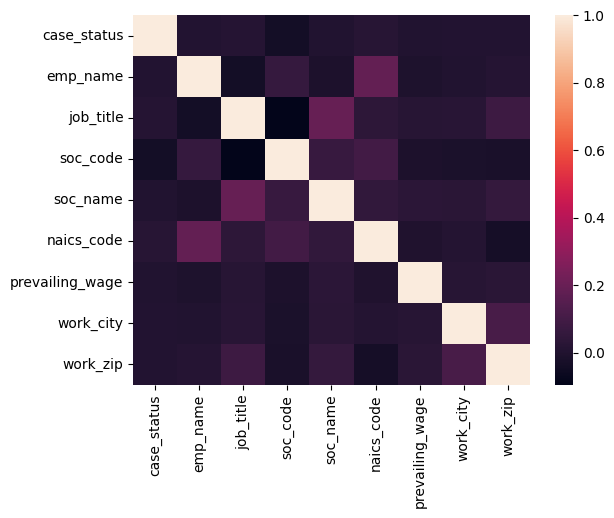

In [ ]:
sns.heatmap(h1b_df4.corr(), annot=False)

In [ ]:
g = sns.PairGrid(h1b_df4)
g.map_upper(plt.scatter, s=3)
g.map_diag(plt.hist)
g.map_lower(plt.scatter, s=3)
g.fig.set_size_inches(12, 12)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

In [ ]:
# Sampling
status_0_rows = h1b_df4[h1b_df4['case_status'] == 0]
status_1_rows = h1b_df4[h1b_df4['case_status'] == 1].sample(n=len(status_0_rows)*1, random_state=42)
selected_rows = pd.concat([status_0_rows, status_1_rows])
print(f"status_0_rows: {len(status_0_rows)}\nstatus_1_rows: {len(status_1_rows)}\nselected_rows: {len(selected_rows)}\n")

# Preprocessing
X = selected_rows.drop("case_status", axis=1)
y = selected_rows["case_status"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but often improves SVM performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Labels for Confusion Matrix
labels = sorted(y.unique())

# Count the number of positive and negative samples in the training data
num_positive_samples = sum(y_train == 1)
num_negative_samples = sum(y_train == 0)
print(f"num_positive_samples: {num_positive_samples}\nnum_negative_samples: {num_negative_samples}\n")
# Calculate the class weight for the negative class (5%)
class_weight = {0: num_positive_samples / (0.05 * num_negative_samples), 1: 1.0}
print(f"class_weight: {class_weight}")

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

status_0_rows: 45894
status_1_rows: 45894
selected_rows: 91788

num_positive_samples: 36723
num_negative_samples: 36707

class_weight: {0: 20.00871768327567, 1: 1.0}


In [ ]:
# Create a Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Define the hyperparameters to tune
# param_grid = {
#     'n_estimators': [50, 100, 150],        # Number of boosting stages to be run
#     'learning_rate': [0.01, 0.05, 0.1],     # Step size shrinkage used in update to prevent overfitting
#     'max_depth': [3, 7, 10]                 # Maximum depth of the individual estimators (trees)
# }
param_grid = {
    'n_estimators': [100],
    'max_depth': [7],
    'learning_rate': [0.1]
}

# Create the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(gradient_boosting, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model and its hyperparameters
best_gb_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_pred_gb = best_gb_model.predict(X_test_scaled)
# Get the probability scores for the positive class (class 1)
y_prob_gb = best_gb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the best model's performance
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
auc_roc_gb = roc_auc_score(y_test, y_prob_gb)
cm_gb = confusion_matrix(y_test, y_pred_gb, labels=labels)

# Print the evaluation metrics and best hyperparameters
print(f"Best Hyperparameters: {best_params}\n")
print(f"Best Gradient Boosting Model")
print(f"Accuracy: {accuracy_gb:.3f}")
print(f"Precision: {precision_gb:.3f}")
print(f"Recall: {recall_gb:.3f}")
print(f"F1 Score: {f1_gb:.3f}")
print(f"AUC-ROC Score: {auc_roc_gb:.3f}\n")
print(f"Confusion Matrix:\n{pd.DataFrame(cm_gb, index=labels, columns=labels)}")

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}

Best Gradient Boosting Model
Accuracy: 0.626
Precision: 0.622
Recall: 0.640
F1 Score: 0.631
AUC-ROC Score: 0.687

Confusion Matrix:
      0     1
0  5627  3560
1  3303  5868


In [ ]:
predicted_values = best_gb_model.predict(X_test_scaled)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predicted_values})
test_df_with_results = pd.concat([X_test, results_df], axis=1)
test_df_with_results[test_df_with_results['Actual']!=test_df_with_results['Predicted']]

,emp_name,job_title,soc_code,soc_name,naics_code,prevailing_wage,work_city,work_zip,Actual,Predicted
3741266,48206,115526,172141,586,54171,78229,6667,33322,1,0
3575403,39186,122498,151133,866,541690,100194,1015,20715,1,0
3887189,37451,100481,151122,493,54151,100526,7451,95141,1,0
3564246,21752,2590,151132,857,54161,67309,1609,60607,0,1
3143117,82573,11049,251031,57,611310,95680,1532,22904,1,0
...,...,...,...,...,...,...,...,...,...,...
3210468,50294,21849,151131,210,541512,55910,5829,10016,1,0
3654564,17446,87138,151122,493,541512,64646,1688,18411,0,1
3354628,15511,116939,151132,857,541511,102565,1532,22902,0,1
3596621,66216,116939,151133,866,3364,72000,1437,52498,0,1


In [ ]:
feature_importances = pd.Series(best_gb_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances)

emp_name           0.359669
prevailing_wage    0.139979
naics_code         0.129455
job_title          0.115865
work_zip           0.087392
soc_code           0.068600
work_city          0.058568
soc_name           0.040471
dtype: float64


In [ ]:
h1b_df4

,case_status,emp_name,emp_city,emp_zip,job_title,soc_code,soc_name,naics_code,prevailing_wage,work_city,work_zip,date_gap
2942264,1,22727,4263,60015,9621,151121,220,522210,59197,7116,60015,220
2942265,1,22274,4263,60015,87011,152031,664,522210,49800,7116,60015,211
2942266,1,24341,5347,20007,142,151131,210,541511,76502,8952,20007,205
2942267,0,38689,2815,48152,75168,151199,201,541511,90376,4093,7302,3
2942268,1,9569,5576,27893,9171,132041,247,522110,116605,5829,10036,588
...,...,...,...,...,...,...,...,...,...,...,...,...
3942259,1,49893,3483,10007,108391,151132,857,541830,114026,5829,10007,6
3942260,1,84901,4559,85260,13308,151199,201,541511,62712,6432,91103,6
3942261,1,48377,3294,7960,72555,151132,857,541511,86154,5481,7960,6
3942262,1,38833,3203,92691,4403,151132,857,541511,98384,5348,92691,6


case_status len
45894

grouped_counts
date_gap
0       12626
1        7512
2        4986
3        3700
4        3958
        ...  
2017        1
2020        1
2040        1
2047        1
2240        1
Length: 1241, dtype: int64

cumulative_sum
date_gap
0       12626
1       20138
2       25124
3       28824
4       32782
        ...  
2017    45890
2020    45891
2040    45892
2047    45893
2240    45894
Length: 1241, dtype: int64

percentage_occurrences
date_gap
10     88.220682
14     88.225040
15     88.227219
16     88.231577
17     88.233756
         ...    
337    91.136096
338    91.149170
339    91.166601
340    91.194927
341    91.199285
Length: 290, dtype: float64



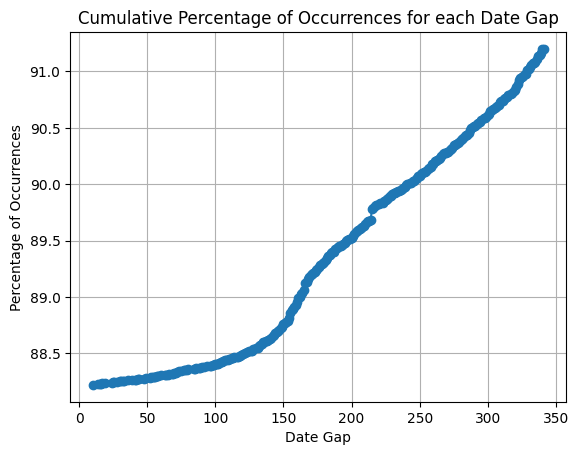

In [ ]:
# Group the data by 'date_gap' and calculate the size of each group
grouped_counts = h1b_df4[h1b_df4['case_status']==0].groupby('date_gap').size()
print(f"case_status len\n{len(h1b_df4[h1b_df4['case_status']==0])}\n")
print(f"grouped_counts\n{grouped_counts}\n")

# Calculate the cumulative sum of occurrences
cumulative_sum = grouped_counts.cumsum()
print(f"cumulative_sum\n{cumulative_sum}\n")

# Calculate the percentage of occurrences for each date_gap
percentage_occurrences = (cumulative_sum / cumulative_sum.max()) * 100
percentage_occurrences = percentage_occurrences[10:300]
print(f"percentage_occurrences\n{percentage_occurrences}\n")

# Plot the percentage of occurrences
plt.plot(percentage_occurrences, marker='o')
plt.xlabel('Date Gap')
plt.ylabel('Percentage of Occurrences')
plt.title('Cumulative Percentage of Occurrences for each Date Gap')
plt.grid(True)
plt.show()